# Data Science Pipeline Tutorial 

 ## Topic: Global UFO Sightings

### Ngoc Tram Hoang

## Introduction

Welcome to Data Science Tutorial! This tutorial walks you through the Data Science pipeline of data curation, parsing and management, expoloratory data analysis, hypothesis testing and machine learning. I hope you enjoy the tutorial!

  ### Background information

Are you curious about UFO? Do you believe there exists aliens in the universe? If not, this turtorial will totally change your mind. There is evidence that will show you that Aliens/UFO exist. Using the National UFO Reporting Center data, we can determine where in the world to go as well as the best ime of the year to go for UFO sightseeing.

UFO Sightings Dataset from Kaggle: https://www.kaggle.com/NUFORC/ufo-sightings?select=scrubbed.csv

## Set Up Libraries

Pandas: Display and organize in dataframes

Numpy: Support data

Matplotlib: Create and format plots

Scikit-learn: Create predictive model

Statsmodels: Support specifying models using R-style formulas and pandas DataFrames

Folium: Mapping

The !pip install ___ commands are used in case your environment does not currently have certain libraries installed


In [1]:
!pip install folium
!pip install timestring
import numpy as np
import pandas as pd
import datetime
import timestring
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as met
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as ms
from sklearn.utils import shuffle
import folium
import warnings


## Data collection

The first step is to load the data from the web. The data was downloaded as a csv file. The codes below used to load data into a DataFrame. The head() function to view the first 5 rows of the table.

In [2]:
df = pd.read_csv('scrubbed.csv')
df.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Data Tidying

Once data is loaded, we can use the DataFrame datatype in Pandas library to manipulate the data. We could combine, drop, add more columns into the DataFrame that makes the data makes sense, easier to follow, and more. 


As we can see, we do not need the "date posted" columns,so we could drop this column.

In [3]:
df = df.drop('date posted', 1)
df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,30.2947222,-82.984167


As we can see, the data we have have two duriation columns but in different units. We just need one and that is enough for observe and computation. Because the unit in 'hours/min' is mixed between hour and minutues, then it is not useful as the 'second' unit, so we could drop the 'duration (hours/min)' columns.

In [4]:
df = df.drop('duration (hours/min)', 1)
df.head(10)

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,penarth uk circle 3mins stayed 30ft above m...,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,Strobe Lighted disk shape object observed clos...,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,Saucer zaps energy from powerline as my pregna...,30.2947222,-82.984167


### Missing Data: NaN
In many dataset, NaN is denoted for missing data, unknown or imcomplete. NaN is not consider to a value to compute, but it is useful to think about why the data is missing. As we can see, in 'state' column, the missing data 'NaN' values appear in in countries do not have the state( other than US). A reason of missing data for country is that if the UFO sighting happened in the military area ( Lackand Aif Force Bace - lackland afb). 

## Exploratory data analysis

Now, we can analysis deeply in our data to figure out the general trend of when and where are the best time and places to have UFO sightings. In order to get these imformation, we should analysis data based on the number of UFO appearances vs. the time of the day, month of the year and specific location in the world. 

#### Analyzing Time of Day for UFO sightings
It will help us to determine the best time of the day to looking for UFO. 
We need to parse the time from 'datetime' columns, and make time into a different columns. Then we can group data by hour to take a look for a trend. *.hour* field of datetime datatype can be used to get hour form datetime.

In [5]:
# make a copy of the original dataframe
time_of_day = df.copy()

# get the hour value from each row's sighting
for idx, row in time_of_day.iterrows():
    try:
        time_of_day.loc[idx,'sighting_hour'] = timestring.Date(row['datetime']).hour
    except ValueError:
        row['datetime'] = row['datetime'].replace(' 24', ' 0')
        time_of_day.loc[idx, 'datetime'] = row['datetime'].replace(' 24', ' 0')
        time_of_day.loc[idx,'sighting_hour'] = timestring.Date(row['datetime']).hour

In [6]:
time_of_day.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude,sighting_hour
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111,20.0
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082,21.0
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667,17.0
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833,21.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,20.0


###### Note 
Why we do try except function? The default is that hours must be in 0..23. If we attempt to parse 24, it would return error, throw exception and halt. Thus we need to assumse that time is at 24 means that 0 in the morning. 

Group by hour and count for how many time does UFO appear in each hour during over 100 past years. 

In [7]:
hr = time_of_day.groupby('sighting_hour').sighting_hour.count().reset_index(name='count')
hr

,sighting_hour,count
0,0.0,4802
1,1.0,3210
2,2.0,2357
3,3.0,2004
4,4.0,1529
5,5.0,1591
6,6.0,1224
7,7.0,905
8,8.0,803
9,9.0,958


Using *matplotlib* library to plot data

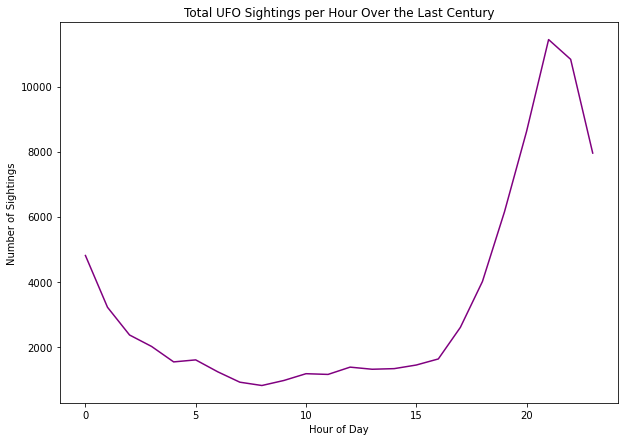

In [8]:
plt.figure(figsize = (10,7))

plt.plot(hr['count'], color='purple')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sightings')
plt.title('Total UFO Sightings per Hour Over the Last Century')
plt.show()

The best time of the day that have high probability to go for UFO sightings is from 18:00 to 0:00 next day.

#### Analyzing Month of Year for UFO sightings
Similarly for processing the time of the day, now we could observe the month of the year for UFO sightings.

In [9]:
month_of_year = time_of_day.copy()

for idx, row in month_of_year.iterrows():
    try:
        month_of_year.loc[idx,'sighting_month'] = timestring.Date(row['datetime']).month
    except ValueError:
        row['datetime'] = row['datetime'].replace(' 24', ' 0')
        month_of_year.loc[idx,'sighting_month'] = timestring.Date(row['datetime']).month

In [10]:
month_of_year.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude,sighting_hour,sighting_month
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111,20.0,10.0
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082,21.0,10.0
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667,17.0,10.0
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833,21.0,10.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,20.0,10.0


In [11]:
months = month_of_year.groupby('sighting_month').sighting_month.count().reset_index(name='count')
months

,sighting_month,count
0,1.0,5689
1,2.0,4665
2,3.0,5450
3,4.0,5527
4,5.0,5293
5,6.0,8152
6,7.0,9520
7,8.0,8636
8,9.0,7589
9,10.0,7407


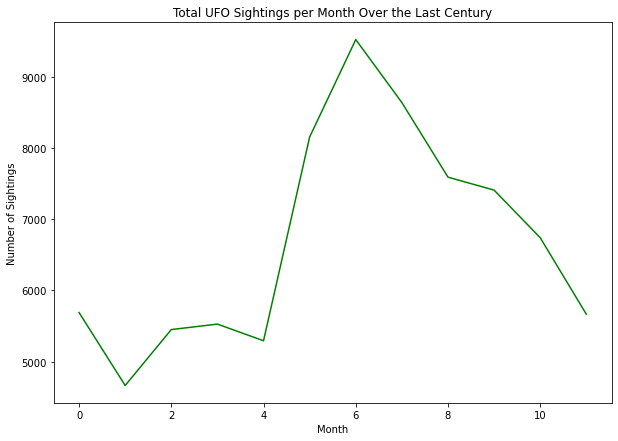

In [12]:
plt.figure(figsize = (10,7))
plt.plot(months['count'], color='green')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.title('Total UFO Sightings per Month Over the Last Century')
plt.show()

It shows that summer is the good period time for UFO sightings, specially July.

#### Analyzing location for UFO sightings
It will help us to determine the best place in the world for UFO sightings. We need ro group the country and make bar plot to see where usually had UFO sightings over las 100 years. Bar plot is useful for compare the values in each location with others.

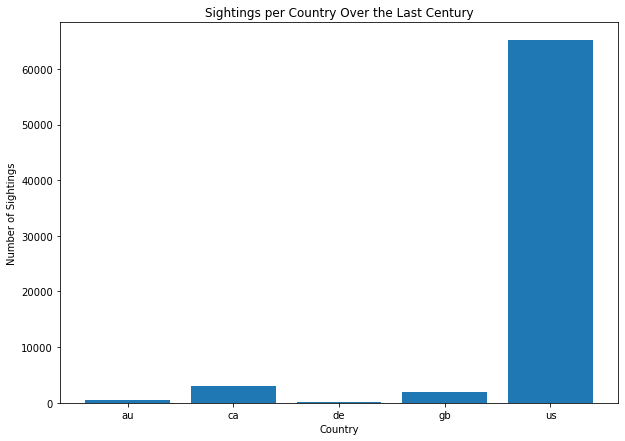

In [13]:
location = time_of_day.copy()
location = location.groupby('country').country.count()

plt.figure(figsize = (10,7))
plt.bar(range(len(location)), list(location[:]), align = 'center')
plt.xticks(range(len(location)), list(location.keys()))
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.title('Sightings per Country Over the Last Century')
plt.show()

As we can see, most of the sightings happen in the U.S, and we have *state* column in our data table, so we can use *state* column to looking for more information about which ten states do most sightings happend?

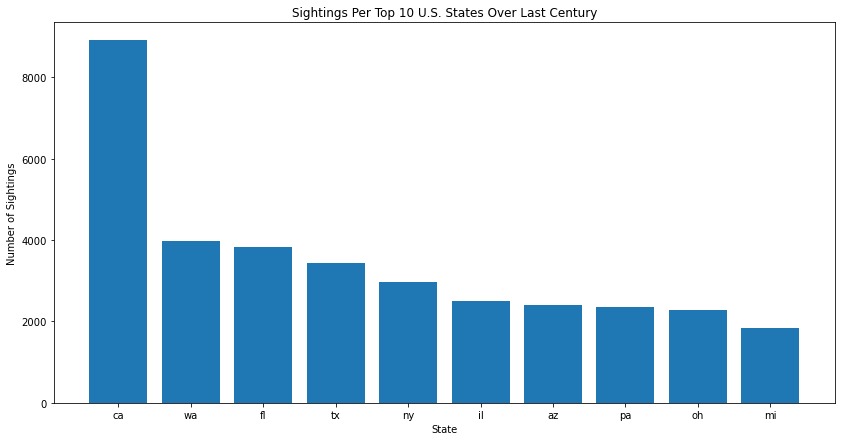

In [14]:
states = time_of_day.copy()
states = states.groupby('state').country.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

plt.figure(figsize = (14,7))
plt.bar(range(len(states)), list(states['count']), align='center')
plt.xticks(range(len(states)), list(states['state']))
plt.title('Sightings Per Top 10 U.S. States Over Last Century')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.show()

The exploratory and plot show that California is the state with the most UFO sightings.  We have *city* column in our data table, so we can use *city* column to looking for more information about which ten cities do most sightings happend in CA?

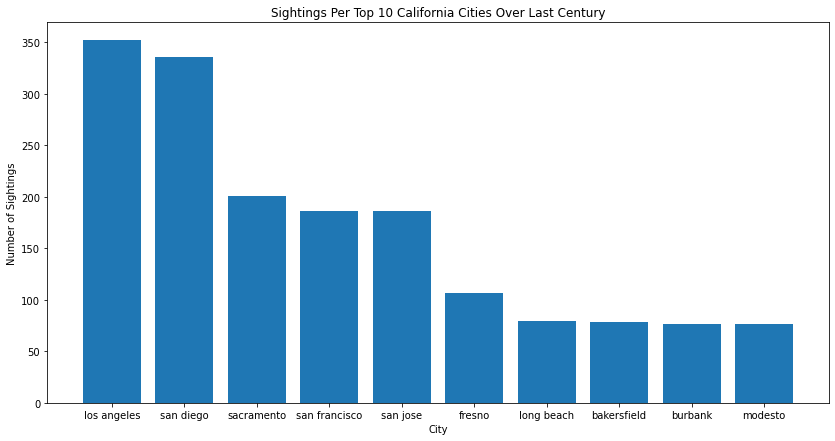

In [15]:
cities = time_of_day.copy()
cities = cities[(cities.state == 'ca')]
cities = cities.groupby('city').city.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

# Plot bar graph
plt.figure(figsize = (14,7))
plt.bar(range(len(cities)), list(cities['count']), align='center')
plt.xticks(range(len(cities)), list(cities['city']))
plt.title('Sightings Per Top 10 California Cities Over Last Century')
plt.xlabel('City')
plt.ylabel('Number of Sightings')
plt.show()

 Summary: 
* The best time in the day to observe UFO is from 18:00 to 0:00 next day
* The best time in year to observe UFO is in July
* The U.S is the number one contry have UFO during last 100 years in over the world.
* California, Washingtion and Florida are the top 3 states in the U.S with the most report about UFO sightings.
* Los Angeles and San Diego are the two cites in California have the hightest number of time UFO occurs.

### Mapping
In order to mapping the results, we should use *folium* library. We will visualize data on interactive map.

we would map random samples of data and discern patterns form that. The codes below will using information for California: location ( latitude and longtidue) is from the data table.

In [16]:
cities = time_of_day.copy()
cities = cities[(cities.state == 'ca')]

# random sample of 200 sightings
samp = cities.sample(200)

# create folium map with initial starting location
map_osm = folium.Map(location=[37.77, -119.42], zoom_start=6)
for idx, row in samp.iterrows():
    # highlight the marker if it's one of our top cities
    if (row['city'] == 'los angeles' or row['city'] == 'san diego' or row['city'] == 'sacramento City' \
        or row['city'] == 'san francisco' or row['city'] == 'san jose' or row['city'] == 'fresno'
        or row['city'] == 'long beach' or row['city'] == 'bakersfield' or row['city'] == 'burbank'
        or row['city'] == 'modesto'):
        folium.Marker(location=[float(row['latitude']), float(row['longitude '])], 
                      popup=str(row['datetime']) + ' -- Shape: ' + str(row['shape']) + ' -- Duration: ' 
                              + str(row['duration (seconds)']), 
                      icon=folium.Icon(color='red')).add_to(map_osm)
    else:
        folium.Marker(location=[float(row['latitude']), float(row['longitude '])], 
                      popup=str(row['datetime']) + ' -- Shape: ' + str(row['shape']) + ' -- Duration: ' 
                              + str(row['duration (seconds)']), 
                      icon=folium.Icon(color='blue')).add_to(map_osm)
map_osm

Based on the graph, we can see the frequency of sightings in the top 10 cities compared to the others cities in California.

## Hypothesis testing and machine learning 
Machine learning is useful for making predictions based on the data we have collected, analized. 

We could come with the hypothesis that we want to test, using the training dataset to train a predictor and predict the output.

In this tutorial, we would look for Decision Tree and K-Nearest Neighbors

### Hypothesis
Based on the dataset, we could predict the number of sightings based on the hours of the day. 

Hypothesis could be: *there is a relationship between the number of sightings and time of the day*. The Null hypothesis would be: *there is not a relationship between the number of sightings and time of the day*. We will use machine learning algorithms to determine whether do we reject the null hypothesis or not.

### Linear Regression
We will start creating the linear regression model for UFO Count vs time of the day.

Coefficients:
 [281.17130435]
Intercept:113.70


Text(0.5, 1.0, 'UFO Count vs Sighting Time of Day with Linear Regression')

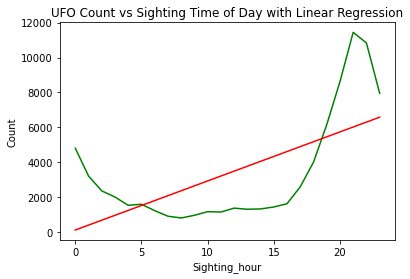

In [17]:
hr = time_of_day.groupby('sighting_hour').sighting_hour.count().reset_index(name='count')

X=np.array(hr['sighting_hour']).reshape(-1,1)
y=np.array(hr['count'])
reg=linear_model.LinearRegression().fit(X,y)

print('Coefficients:\n', reg.coef_)
print('Intercept:%.2f'%reg.intercept_)


#Plot the linear regression line with the data
plt.plot(hr['sighting_hour'], hr['count'], color='green',)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel("Sighting_hour")
plt.ylabel("Count")
plt.title("UFO Count vs Sighting Time of Day with Linear Regression")

### Traing and Testing
We train and test dataset. To ensure the cuts are similar in distribution, we will randomly shuffle data before splitting. To increase the accuracy of training while still leaving a sufficient amount data to test, we put 75% of the data into training and 25% into testing

In [18]:
grouped_sightings = time_of_day.copy()
grouped_sightings['datetime'] = pd.to_datetime(grouped_sightings['datetime'])
# get date from datetime
grouped_sightings['date'] = grouped_sightings['datetime'].dt.date
# group by date and number of sightings per each hour
grouped_sightings = grouped_sightings.groupby([grouped_sightings['date'], grouped_sightings['sighting_hour']],
                                              as_index=True).sighting_hour.count().reset_index(name='count')
grouped_sightings.sort_values('count', ascending=False).head()


# randomly shuffle the dataset
shuffled_sight = grouped_sightings.copy()
shuffled_sight = shuffle(shuffled_sight)

# 75-25 split
training = shuffled_sight[0:int(len(shuffled_sight) * (3/4))]
testing = shuffled_sight[int(len(shuffled_sight) * (3/4))::]
x_train = training['sighting_hour']
y_train = training['count']

# split the data
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(x_train, y_train, test_size = 0.25)


In [19]:
# convert series object into array
arr = ind_train.values
arr2 = dep_train.values
arr3 = ind_test.values
arr4 = dep_test.values

# reshaping series   
ind_train = arr.reshape((len(ind_train), 1))
dep_train = arr2.reshape((len(dep_train), 1))
ind_test = arr3.reshape((len(ind_test), 1))
dep_test = arr4.reshape((len(dep_test), 1))

### Decision Tree

In [20]:
dt = DecisionTreeClassifier()
dt.fit(ind_train, dep_train)

DecisionTreeClassifier()

In [21]:
predicted = dt.predict(ind_test)
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
actual = np.array(dep_test)
predictions = np.array(predicted)
met.confusion_matrix(actual, predictions)

array([[6694,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [1657,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 587,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 240,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 118,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [  55,    0,    0,    0,    0,    0,    0,    0,    0,    

### K-Nearest Neighbors
The alogrithm is to find the k closest training samples in the feature space. We will test for K values for 1-10 and observe the results.

In [23]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(ind_train, dep_train)
    pred = knn.predict(ind_test)
    score = knn.score(dep_test, pred)
    print('K = ' + str(k) + ' Score: ' + str(score))

/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 1 Score: 0.8364347642207655


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 2 Score: 1.0


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 3 Score: 1.0


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 4 Score: 0.9115034891097483


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 5 Score: 0.9115034891097483


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 6 Score: 0.9115034891097483


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 7 Score: 1.0


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 8 Score: 1.0


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 9 Score: 1.0


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 10 Score: 1.0


It turns out that thr KNN regression has high accuracy rate for the data.

#### Conclusion for Hypothesis
Based on the scores, we could reject the null hypothesis. There is a relationship between the time of the day and number of UFO sightings. 

## UFO Sightings Decision
We have done in analyzing the data. It is time to grap up all useful information and general trend from dataset and plots.
### Where and when are perfect for UFO sightings
Based on the results, there are high probability for appearing UFO in US, specifically Los Angeles and San Diego in California during July at about 18:00 to 0:00 next day. 

## Conclusion
You can try to apply for different detail about UFO sightings based on different columns in data table. For example, you can try to find the shape of UFO vs. the best time to observer or shape with locations it occurs the most.

You can apply this tutuiral to a different topics and problems in the real scenario. The data could be different and some step to extract data from data set may change but the basic concept will the same. 
The most importing things would you want to take away is about libraries. You should know which one is about to and functions that library to apply to your code, so you could take advantages of these when applying them into your own assigment or projects. 

Understand what the data means will be very important and benificial for your study and your jobs. 

##  References
If you like to learn more about material in thie tutorial, here are some useful references:

You could find the new dataset here: <a href="https://www.kaggle.com/datasets" target="_blank">link</a>

More information and fields of scikit-learn: <a href="https://scikit-learn.org/stable/index.html" target="_blank">link</a>

Linear Regression: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">link</a>

K-Nearest Neighbors: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">link</a> 

Decision Tree: <a href="https://scikit-learn.org/stable/modules/tree.html" target="_blank">link</a> 

Tidy Data in Python: <a href="http://www.jeannicholashould.com/tidy-data-in-python.html" target="_blank">link</a>

Working with missing data: <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html" target="_blank">link</a>

Matplotlib:  <a href="https://matplotlib.org" target="_blank">link</a>